# Linear Regression
## Task 1

#### Problem Statement:

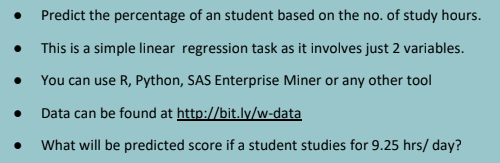




Steps:
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
df = pd.read_csv("student_scores - student_scores.csv")

In [4]:
# Let's take a look at the first few rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Let's look at the number of rows and columns in the dataset
df.shape

(25, 2)

In [6]:
# Understanding the feature names in the dataset
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# Getting insights of the features
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Summary of the dataset: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#Null Values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no NULL values

### 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it

We'll visualise our data using `matplotlib` and `seaborn`.

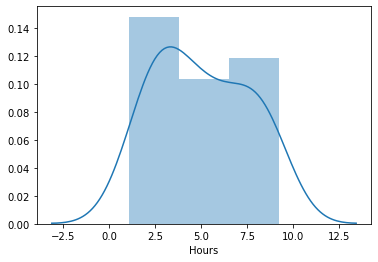

In [10]:
# temperature
sns.distplot(df['Hours'])
plt.show()

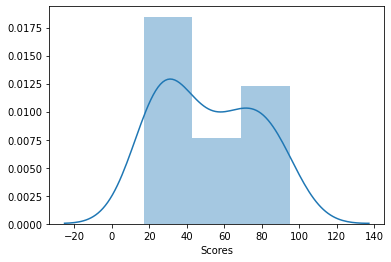

In [11]:
# feeling temperature
sns.distplot(df['Scores'])
plt.show()

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

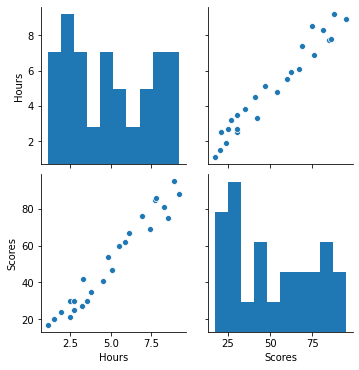

In [12]:
# Pairwise scatter plot
sns.pairplot(df)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [13]:
# Correlation matrix
cor = df.corr()
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Let's plot the correlations on a heatmap for better visualisation

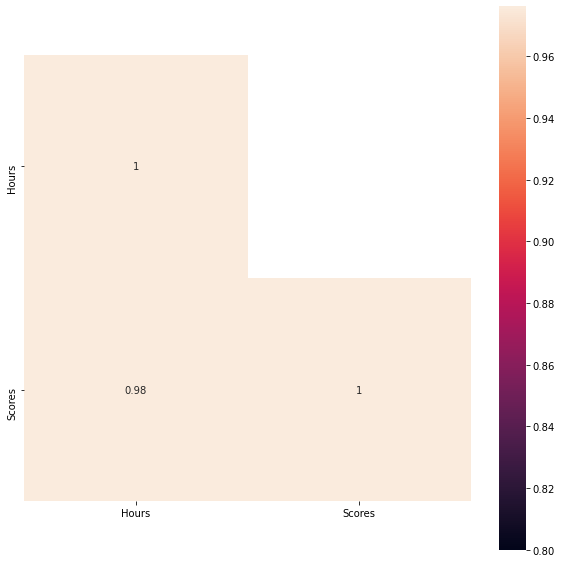

In [14]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

There is high correlation of Hours with Scores i.e. 0.98


### Outlier Analysis

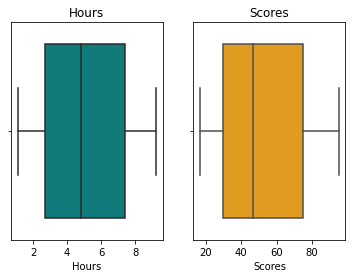

In [15]:
# Hours
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Hours',color='darkcyan')
plt.title('Hours')

# Scores
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Scores',color='orange')
plt.title('Scores')
plt.show()

## 3. Model Building and Evaluation

Let's start building the model. The first step to model building is the test-train split. So let's perform that

In [16]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [17]:
df_train.head()

,Hours,Scores
6,9.2,88
12,4.5,41
4,3.5,30
24,7.8,86
0,2.5,21


#### Dividing into X and Y sets for the model building

In [18]:
# Splitting the data into corresponding X and Y

X_train = df_train['Hours']
y_train = df_train['Scores']

In [19]:
X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [20]:
X_train.shape

(17,)

### Building the first model with all the features

Let's now build our first model with all the features.

In [21]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [22]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_lm, y_train)

LinearRegression()

In [23]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[0.         9.87171443]
1.4951421092363901


In [24]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.15e-11
Time:                        22:13:51   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model has an Adjusted R-squared value of **95.4%** which seems pretty good. 

In [25]:
y_train_pred=lr.predict(X_train_lm)

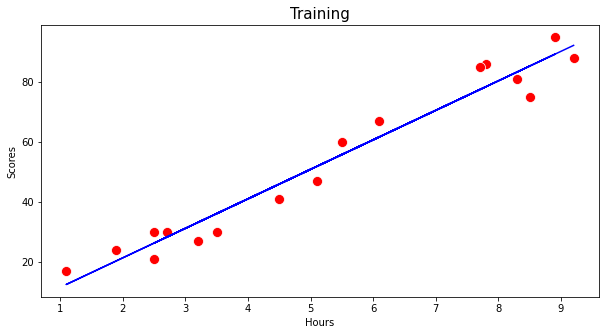

In [26]:
# Plotting the Regression equation for the best line
plt.figure(figsize=(10,5))
sns.scatterplot(X_train,y_train,s=100,color='r')
plt.plot(X_train,lr.predict(X_train_lm),'b')
plt.xlabel(xlabel='Hours',fontsize=10)
plt.ylabel(ylabel='Scores',fontsize=10)
plt.title('Training',fontsize=15)
plt.show()

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

Text(0.5, 0, 'Errors')

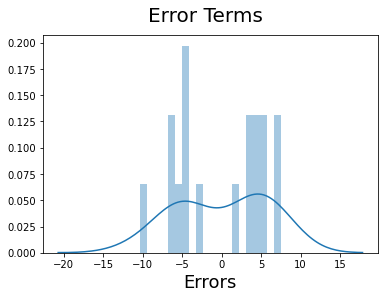

In [27]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

The error terms are fairly normally distributed. Let's now make predictions on the test-set.

In [28]:
# Splitting the test dataset into X and Y
X_test = df_test['Hours']
y_test = df_test['Scores']

In [29]:
X_test.head()

9     2.7
22    3.8
13    3.3
11    5.9
5     1.5
Name: Hours, dtype: float64

In [30]:
# Making the predictions 
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr.predict(X_test_sm)

y_test_pred

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
19    74.545829
23    69.609972
21    48.879371
dtype: float64

Text(0, 0.5, 'y_test_pred')

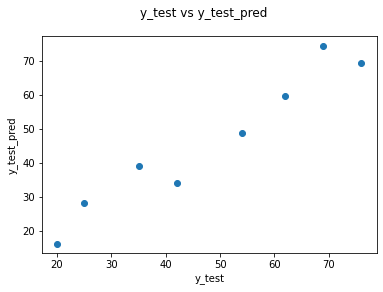

In [31]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_test_pred')  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [32]:
# Calculating the R2 scores for train and test data
print('R2 score for the training data : ',round(r2_score(y_train,y_train_pred),3))
print('R2 score for the testing data : ',round(r2_score(y_test,y_test_pred),3))

R2 score for the training data :  0.957
R2 score for the testing data :  0.931


Thus, for the model, the r-squared on training and test data is about **95.7%** and **93.1%** respectively. The adjusted r-squared on the train set is about is about 95.40%.

In [33]:
# Model evaluation using RMSE and RMAE values
print('Mean Squared Error : ',round(MSE(y_test,y_test_pred),2))
print('Mean Absolute Error : ',round(MAE(y_test,y_test_pred),2))
print()
print('Root Mean Squared Error : ',round(np.sqrt(MSE(y_test,y_test_pred)),2))
print('Root Mean Absolute Error : ',round(np.sqrt(MAE(y_test,y_test_pred)),2))

Mean Squared Error :  25.68
Mean Absolute Error :  4.76

Root Mean Squared Error :  5.07
Root Mean Absolute Error :  2.18


In [35]:
# Making predictions 

hours = 9.25

hrs = sm.add_constant(pd.DataFrame({'Hours':[hours]}),has_constant='add')

score = lr.predict(hrs)

print('A student is predicted to score {1} if he/she studies {0} hours/day.'.format(hours,round(score[0],2)))

A student is predicted to score 92.81 if he/she studies 9.25 hours/day.
